In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# Read Data

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- we note that this data is perfect 
- all data type don't need to convert
- we don't have null

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.quantile([0.6,0.8,0.9,0.95,0.99,1])

,age,bmi,children,charges
0.60,44.0,32.0320,1.0,11399.857160
0.80,54.0,35.8600,2.0,20260.626406
0.90,59.0,38.6195,3.0,34831.719700
0.95,62.0,41.1060,3.0,41181.827787
0.99,64.0,46.4079,5.0,48537.480726
1.00,64.0,53.1300,5.0,63770.428010


- we note that:
1. range age between(18,64)
2. we need to check outliers in bmi and children and charges

In [16]:
# Null
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
# check duplicated
df.duplicated().sum()

1

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
# check duplicated
df.duplicated().sum()

0

# EDA and visualization

In [20]:
df_eda=df.copy()

In [21]:
df_eda.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1- univarte

### Numerical data

##### Distribution of age

In [22]:
#pandas
df_eda["age"].value_counts().nlargest()

18    69
19    67
50    29
51    29
47    29
Name: age, dtype: int64

<AxesSubplot:title={'center':'Distribution of age'}, xlabel='age', ylabel='Count'>

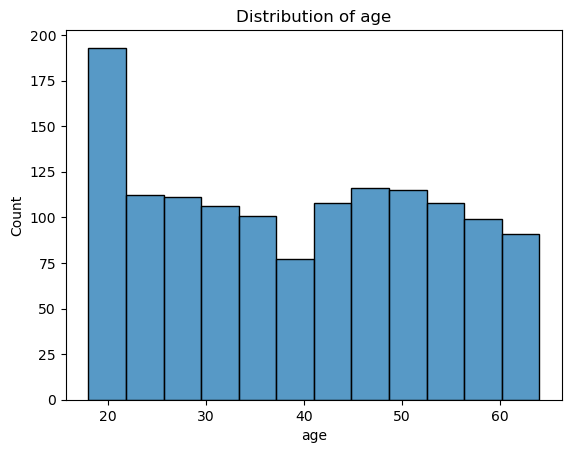

In [23]:
# seaborn
plt.title("Distribution of age")
sns.histplot(df_eda["age"])

- age not have outliers
- most values duplicted in 18 and 19

--------------------------------------

##### Distribution of bmi

In [27]:
#pandas
df_eda["bmi"].value_counts().nlargest()

32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
Name: bmi, dtype: int64

<AxesSubplot:title={'center':'Distribution of bmi'}, xlabel='bmi', ylabel='Count'>

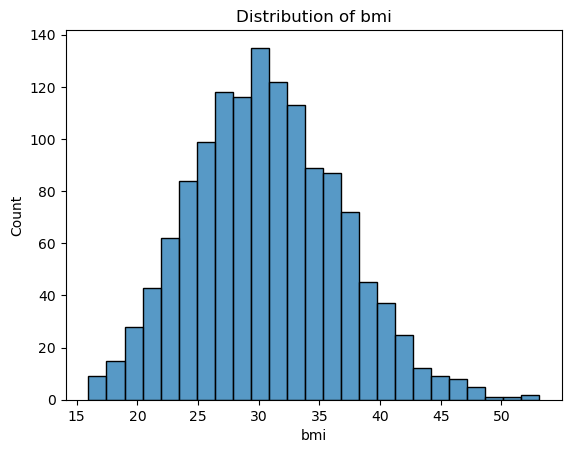

In [28]:
# seaborn
plt.title("Distribution of bmi")
sns.histplot(df_eda["bmi"])

- we note that this a symetric distribution and not have outliers

------------------------------------

##### Distribution of children

In [31]:
#pandas
df_eda["children"].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:title={'center':'Distribution of children'}, xlabel='children', ylabel='Count'>

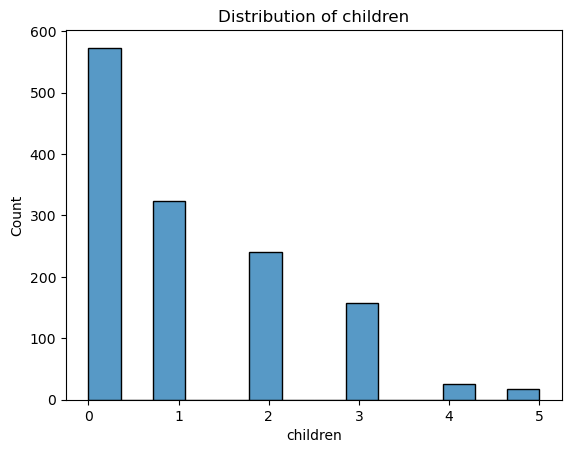

In [41]:
# seaborn
plt.title("Distribution of children")
sns.histplot(df_eda["children"])

In [39]:

px.box(data_frame=df_eda,x="children")

- we have ouliers and have to drop it 

In [44]:
df_eda.drop(df_eda[df_eda["children"]>=4].index,axis=0,inplace=True)

----------------------------------------------------

##### Distribution of charges

<AxesSubplot:title={'center':'Distribution of charges'}, xlabel='charges', ylabel='Count'>

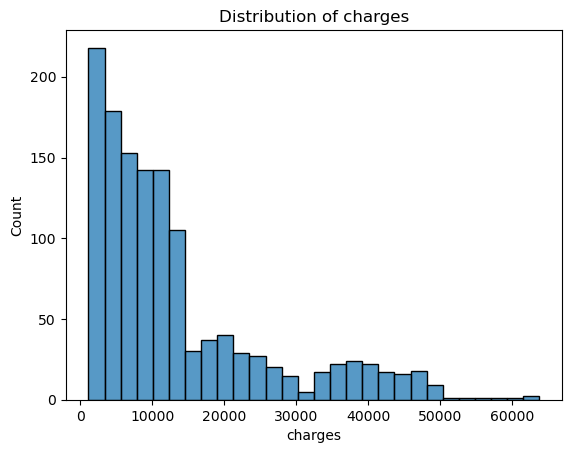

In [45]:
# seaborn
plt.title("Distribution of charges")
sns.histplot(df_eda["charges"])

In [107]:
px.histogram(np.log(df_eda["charges"]))

- scaling with log make distribution more efficient

In [46]:

px.box(data_frame=df_eda,x="charges")

In [50]:
df_eda.charges.quantile([0.5,0.7,0.8,0.9,0.93,0.95,0.98,0.99,1]).round(2)

0.50     9369.62
0.70    13832.45
0.80    20661.78
0.90    35124.08
0.93    39022.43
0.95    41761.14
0.98    46742.12
0.99    48557.88
1.00    63770.43
Name: charges, dtype: float64

- somehow range from 50% to 99% is normail but we have to drop all values after 99% (outliers)

In [57]:
df_eda.drop(df_eda[df_eda.charges > df_eda.charges.quantile(0.99)].index,axis=0,inplace=True)

-------------------------------------------------

### categorical data

In [59]:
df_eda.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### value counts of sex , smoker and region

In [64]:
df_eda.sex.value_counts()

male      643
female    638
Name: sex, dtype: int64

In [65]:
df_eda.smoker.value_counts()

no     1024
yes     257
Name: smoker, dtype: int64

In [66]:
df_eda.region.value_counts()

southeast    346
northwest    315
northeast    313
southwest    307
Name: region, dtype: int64

----------------------------------

## 2-Bivarate

In [67]:
df_eda.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### age / bmi

<AxesSubplot:xlabel='bmi', ylabel='age'>

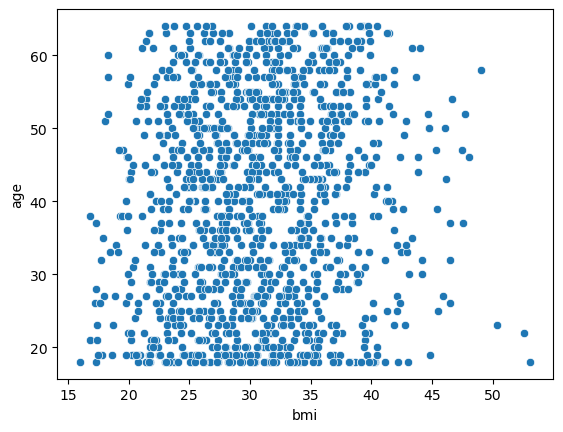

In [71]:
sns.scatterplot(data=df_eda,x="bmi",y="age")

##### age / sex

In [80]:
#pandas
data=df_eda.groupby(["age","sex"]).agg({"sex":"count"}).rename(columns={"sex":"count"}).reset_index()
data

,age,sex,count
0,18,female,32
1,18,male,36
2,19,female,32
3,19,male,34
4,20,female,13
...,...,...,...
89,62,male,11
90,63,female,11
91,63,male,11
92,64,female,11


In [81]:
#plolty
px.bar(data_frame=data,x="age",y="count",color="sex")

##### age / charges

<AxesSubplot:xlabel='age', ylabel='charges'>

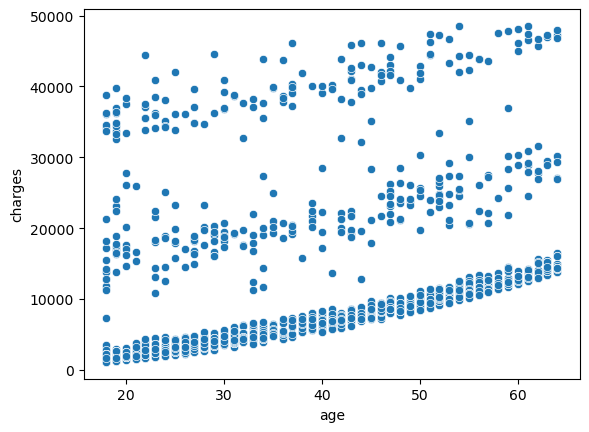

In [82]:
sns.scatterplot(data=df_eda,x="age",y="charges")

##### children / charges

<AxesSubplot:xlabel='children', ylabel='charges'>

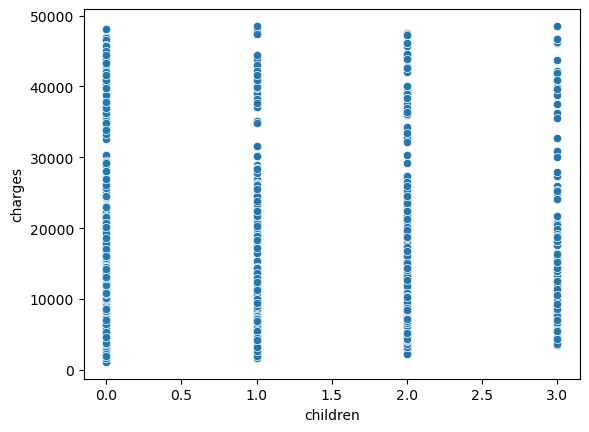

In [83]:
sns.scatterplot(data=df_eda,x="children",y="charges")

---------------------------------

### 3-multivarate

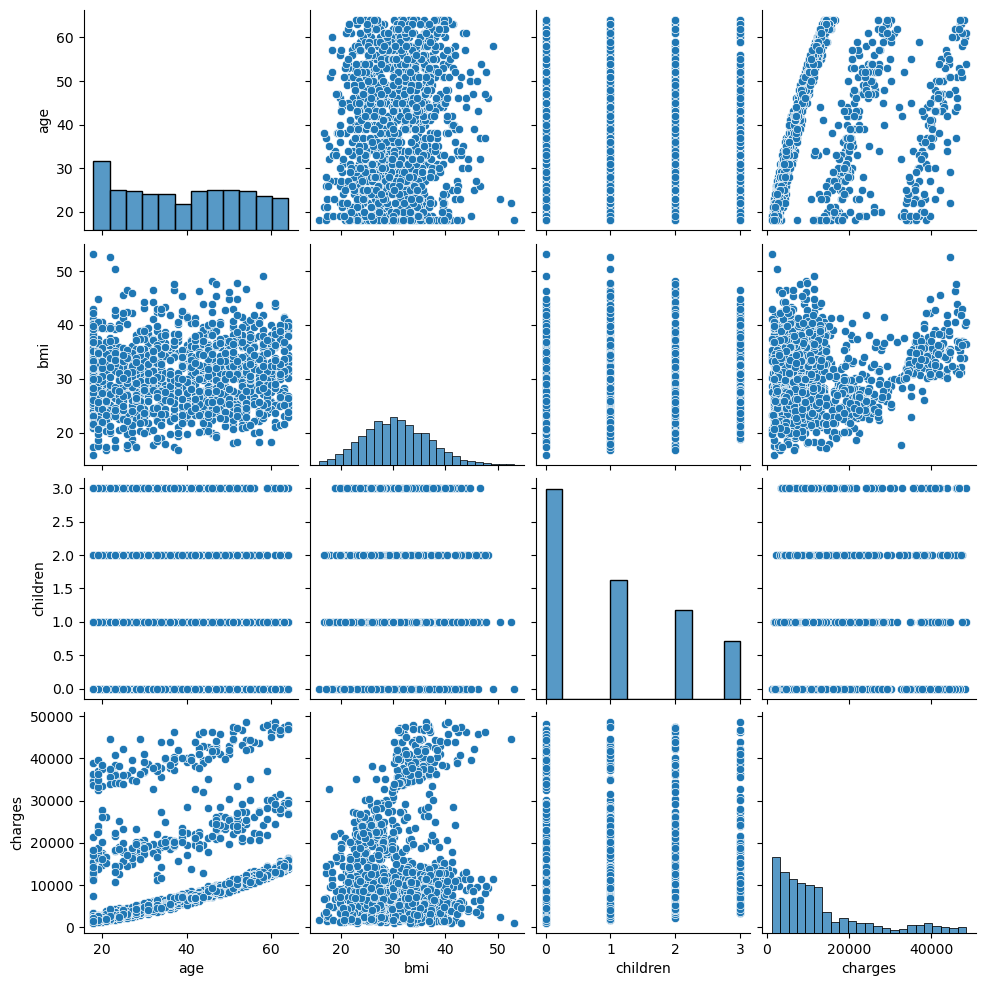

In [84]:
sns.pairplot(data=df_eda)

In [89]:
df_eda.corr()

,age,bmi,children,charges
age,1.000000,0.098864,0.065515,0.292433
bmi,0.098864,1.000000,0.021880,0.173526
children,0.065515,0.021880,1.000000,0.111608
charges,0.292433,0.173526,0.111608,1.000000


<AxesSubplot:>

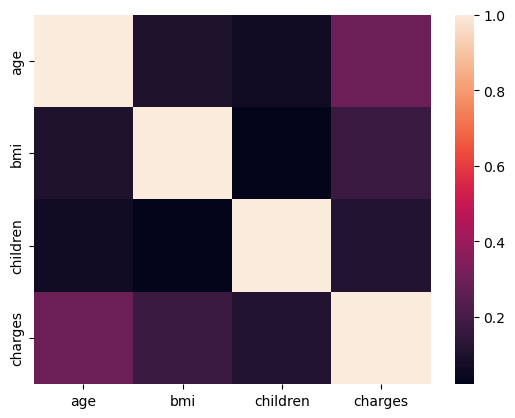

In [90]:
sns.heatmap(df_eda.corr())

--------------------------------------------------

# preprocessing

### Train & Test

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
df_eda

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [93]:
X=df_eda.drop(["charges"],axis=1)

In [94]:
y=df_eda["charges"]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

-------------------------------

### pipeline

In [96]:
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [100]:
numercial_transform=Pipeline(steps=[
                                    ("scaler",StandardScaler()),
                                    ("imputer",SimpleImputer(strategy="median"))
                                    ])

In [101]:
categorical_transform=Pipeline(steps=[
                                      ("binary",BinaryEncoder())
                                        ])

In [103]:
preprocessor=ColumnTransformer(transformers=[
                                            ("num",numercial_transform,['age','bmi', 'children']),
                                            ("cat",categorical_transform,['sex','smoker', 'region'])
                                                ])

In [104]:
X_train_preprocessor=preprocessor.fit_transform(X_train)

In [105]:
X_test_preprocessor=preprocessor.transform(X_test)

In [109]:
# scaling charges by log

y_train_log=np.log(y_train)
y_test_log=np.log(y_test)

--------------------------------------

# Model

#### Ridge 

In [113]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [114]:
alphas=[0.01 , 0.1, 0 , 1 , 10 ,100]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train_preprocessor,y_train_log)
    score_ridge=ridge.score(X_test_preprocessor,y_test_log)
    print(f"alpha = {alpha}")
    print(f"Accuarcy = {score_ridge}")
    print("-----------------------------------")


alpha = 0.01
Accuarcy = 0.6859625443767541
-----------------------------------
alpha = 0.1
Accuarcy = 0.6859549389682162
-----------------------------------
alpha = 0
Accuarcy = 0.6859633853951352
-----------------------------------
alpha = 1
Accuarcy = 0.6858753193170682
-----------------------------------
alpha = 10
Accuarcy = 0.6847441260810028
-----------------------------------
alpha = 100
Accuarcy = 0.6544238782713924
-----------------------------------


- best accuarcy when alpha =0 (ols)

#### OLS with polynomial

In [115]:
from sklearn.linear_model import LinearRegression


In [116]:
degrees=[0,1,2,3]
for degree in degrees:
    poly=make_pipeline(PolynomialFeatures(degree=degree),LinearRegression())
    poly.fit(X_train_preprocessor,y_train_log)
    score_poly=poly.score(X_test_preprocessor,y_test_log)
    print(f"degree = {degree}")
    print(f"Accuarcy = {score_poly}")
    print("-----------------------------------")

degree = 0
Accuarcy = -0.004430110052834113
-----------------------------------
degree = 1
Accuarcy = 0.6859633853951356
-----------------------------------
degree = 2
Accuarcy = 0.7426854209164567
-----------------------------------
degree = 3
Accuarcy = 0.741295129580468
-----------------------------------


- best accuarcy when degree = 2

In [117]:
poly=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
poly.fit(X_train_preprocessor,y_train_log)
score_poly=poly.score(X_test_preprocessor,y_test_log)

In [118]:
score_poly

0.7426854209164567

##### predict 

In [120]:
y_pre_test_log=poly.predict(X_test_preprocessor)

In [121]:
# return charges to exp
y_pre_test=np.exp(y_pre_test_log)

In [123]:
data_compare=pd.DataFrame({"orginal_charges":y_test,
                            "predict_charges":y_pre_test})

In [124]:
data_compare

,orginal_charges,predict_charges
1295,1964.78000,2046.780679
791,1252.40700,1737.080201
1274,17043.34140,17561.029622
800,7046.72220,7762.278956
696,29186.48236,13398.924044
...,...,...
441,37079.37200,37213.023106
362,13844.50600,14687.125350
855,1875.34400,2305.756411
275,9715.84100,10893.248117


---------------------

# Saving

In [125]:
import pickle

In [126]:
# save preprocessing pipeline
preprocessor=pickle.dump(preprocessor,open("preprocessor.pkl","wb"))


In [127]:
# save model
model=pickle.dump(poly,open("model.pkl","wb"))
